In [1]:
import sys, os

import omnifig as fig

import pydip

fig.initialize('diplomacy')

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, color, morphology
from skimage.segmentation import flood, flood_fill

from PIL import Image, ImageDraw, ImageColor
from PIL.ImageDraw import floodfill

from src.colors import fill_region

In [120]:
im = data.camera()
im = data.chelsea()/255
im.shape, im.dtype

((300, 451, 3), dtype('float64'))

In [8]:

image_path = r"extra\standard_c_simple.gif"
# image_path = r'extra/KE7CM.png'

# img = mpimg.imread(image_path)/255
# img = cv2.imread(image_path)/255
# im = Image.fromarray(img)

In [17]:
from PIL import Image
im = Image.open(image_path).convert("RGB")
print(im.size)
img = np.array(im)
# img = mpimg.imread(image_path)
img.shape

(1986, 2001)


(2001, 1986, 3)

In [14]:
fl = fill_region(img, loc=(900,600), val=[255,0,0], threshold=0.1, make_copy=True)

In [18]:
from matplotlib.figure import figaspect

In [24]:
H, W, _ = img.shape
w, h = figaspect(H/W)
scale = 1.5
w,h = scale*w, scale*h
w,h
# fig = Figure(figsize=(w, h))

(7.146026986506747, 7.199999999999999)

<IPython.core.display.Javascript object>


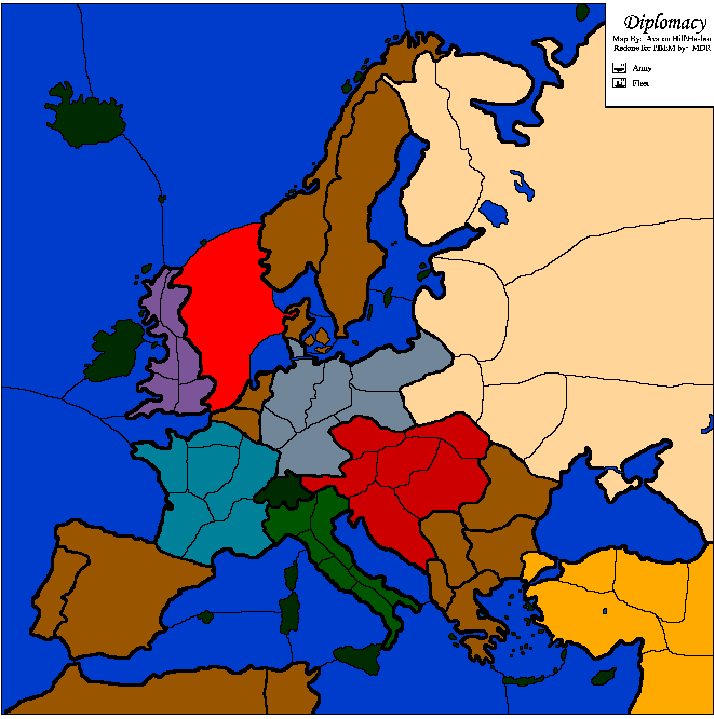

(-0.5, 1985.5, 2000.5, -0.5)

In [25]:
plt.figure(figsize=(w,h))
plt.imshow(fl)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
plt.axis('off')

In [27]:
plt.savefig('test.png', dpi=W/w)

In [34]:
rgbs = [tuple(int(x) for x in line.split(' ')) for line in raw.split('\n')]
print(['#{:02x}{:02x}{:02x}'.format(*rgb) for rgb in rgbs])

['#000000', '#010067', '#d5ff00', '#ff0056', '#9e008e', '#0e4ca1', '#ffe502', '#005f39', '#00ff00', '#95003a', '#ff937e', '#a42400', '#001544', '#91d0cb', '#620e00', '#6b6882', '#0000ff', '#007db5', '#6a826c', '#00ae7e', '#c28c9f', '#be9970', '#008f9c', '#5fad4e', '#ff0000', '#ff00f6', '#ff029d', '#683d3b', '#ff74a3', '#968ae8', '#98ff52', '#a75740', '#01fffe', '#ffeee8', '#fe8900', '#bdc6ff', '#01d0ff', '#bb8800', '#7544b1', '#a5ffd2', '#ffa6fe', '#774d00', '#7a4782', '#263400', '#004754', '#43002c', '#b500ff', '#ffb167', '#ffdb66', '#90fb92', '#7e2dd2', '#bdd393', '#e56ffe', '#deff74', '#00ff78', '#009bff', '#006401', '#0076ff', '#85a900', '#00b917', '#788231', '#00ffc6', '#ff6e41', '#e85ebe']


In [40]:
floodfill(im, (600,900), (100,100,100,255), thresh=250)

<IPython.core.display.Javascript object>


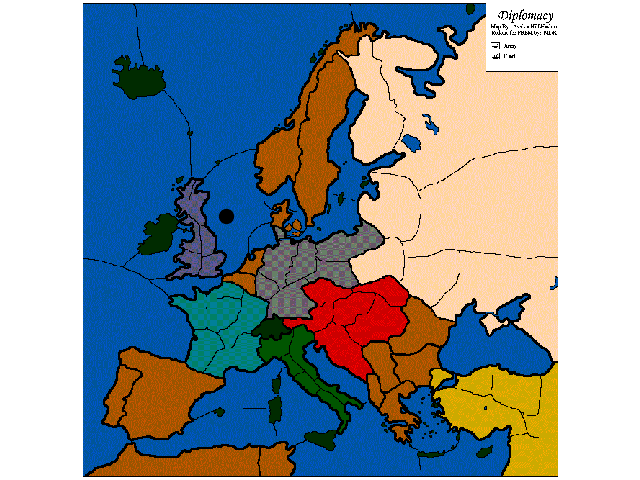

In [51]:
plt.figure()
plt.imshow(im)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
plt.plot([600], [900], ls='', marker='o', c='k', ms=10)
plt.axis('off')
pass

In [3]:
# im_in = cv2.imread(, cv2.IMREAD_GRAYSCALE)
th, im_th = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)
im_floodfill = im_th.copy()
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

In [ ]:
plt.figure()
plt.imshow(img)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
plt.plot([600], [900], ls='', marker='o', c='k', ms=10)
plt.axis('off')
pass

In [16]:
filled_checkers = flood_fill(img, (76, 76), (100,100,100))

ValueError: parameter multi_index must be a sequence of length 3

In [ ]:
plt.figure()
plt.imshow(filled_checkers)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
plt.plot([600], [900], ls='', marker='o', c='k', ms=10)
plt.axis('off')
pass

<IPython.core.display.Javascript object>


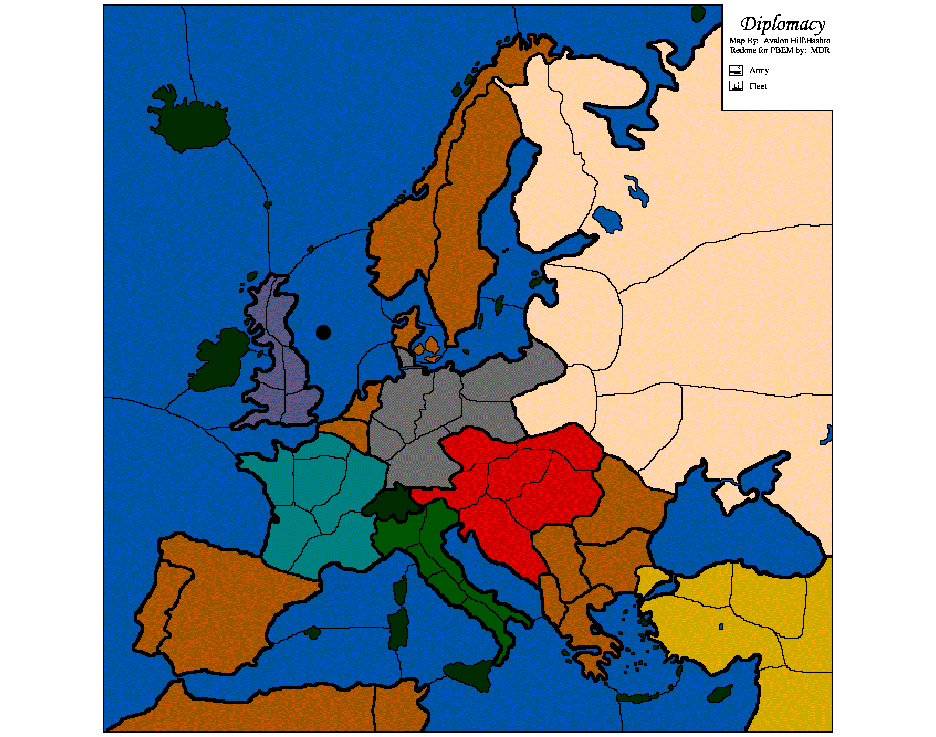

In [46]:
cv2.floodFill(im_floodfill, mask, (0,0), 255);
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
im_out = im_th | im_floodfill_inv


error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\floodfill.cpp:491: error: (-5:Bad argument) Number of channels in input image must be 1 or 3 in function 'cv::floodFill'


In [12]:
flood_fill?

<IPython.core.display.Javascript object>


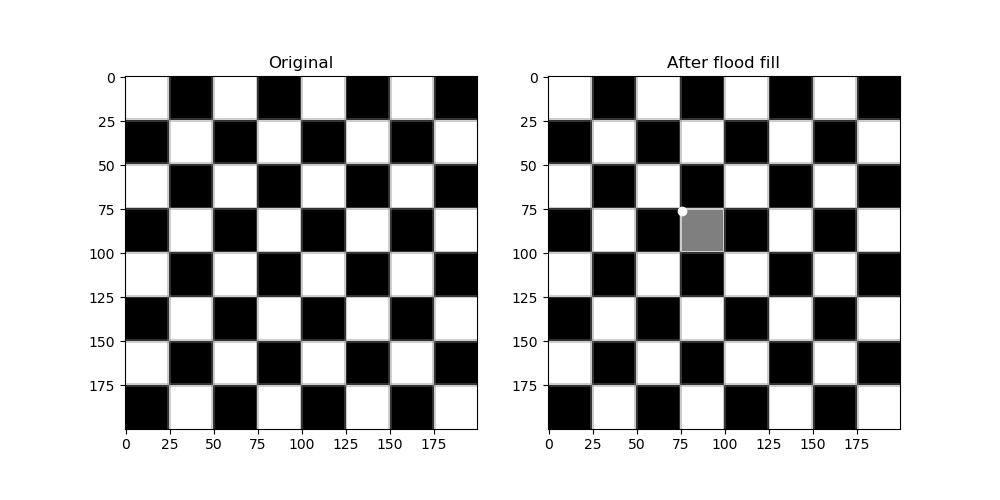

In [10]:


checkers = data.checkerboard()

# Fill a square near the middle with value 127, starting at index (76, 76)
filled_checkers = flood_fill(checkers, (76, 76), 127)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(checkers, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filled_checkers, cmap=plt.cm.gray)
ax[1].plot(76, 76, 'wo')  # seed point
ax[1].set_title('After flood fill')
pass

In [2]:
from pydip.player.unit import UnitTypes

In [3]:
# This scripts contains an example of how to use PyDip.
from pprint import pprint

from pydip.map.predefined import vanilla_dip
from pydip.player import Player, command
from pydip.turn import resolve_turn, resolve_retreats, resolve_adjustment

# The test module contains some convenient helpers (not used in this examples,
# in order to better demonstrate how PyDip works)
from pydip.test import CommandHelper, PlayerHelper, TurnHelper, CommandType


In [40]:
Player?

In [24]:
all_cmds = [command.AdjustmentCreateCommand, command.AdjustmentDisbandCommand,
command.ConvoyMoveCommand, command.ConvoyTransportCommand, 
command.HoldCommand, command.MoveCommand, command.SupportCommand,
command.RetreatDisbandCommand, command.RetreatMoveCommand]
len(all_cmds)

9

In [37]:
args = {
    'build': ['ownership_map', 'player', 'unit'],
    'destroy': ['player', 'unit'],
    
    'convoy-move': ['player', 'unit', 'destination'],
    'convoy-transport': ['player', 'unit', 'transported_unit', 'destination'],
    'hold': ['player', 'unit'],
    'move': ['player', 'unit', 'destination'],
    'support': ['player', 'unit', 'supported_unit', 'destination'],
    'support-defend': ['player', 'unit', 'supported_unit'],
    
    'disband': ['retreat_map', 'player', 'unit'],
    'retreat': ['retreat_map', 'player', 'unit', 'destination'],
}

In [2]:
A = fig.get_config('debug', _type='map',)
A

[0x221c5fd9b88]{{_meta, map, image_path, edges_path, nodes_path, out_path, _type}}

In [3]:
M = A.pull_self()

| CREATING . (type=map)
|  > nodes_path: 'data\\base_nodes.yaml'
|  > edges_path: 'data\\base_edges.yaml'
|  > pos_path: None (by default)


In [5]:
M._dmap

In [22]:
from pydip.player.unit import UnitTypes

_unit_vocab = {
    'fleet': UnitTypes.FLEET,
    'navy': UnitTypes.FLEET,
    'F': UnitTypes.FLEET,
    'f': UnitTypes.FLEET,
    'ship': UnitTypes.FLEET,
    1: UnitTypes.FLEET,
    '1': UnitTypes.FLEET,
    
    'army': UnitTypes.TROOP,
    'troop': UnitTypes.TROOP,
    'A': UnitTypes.TROOP,
    'a': UnitTypes.TROOP,
    'soldier': UnitTypes.TROOP,
    0: UnitTypes.TROOP,
    '0': UnitTypes.TROOP,
}


{'fleet': <UnitTypes.FLEET: 1>}

In [23]:
pydip.player.unit.UnitTypes.TROOP

<UnitTypes.TROOP: 0>

In [5]:


# PyDip provides a predefined map of vanilla Diplomacy
# the most extensive generator defines the map, supply centers and ownership
vanilla_map = vanilla_dip.generate_starting_ownership_map()

game_map = vanilla_map.supply_map.game_map

In [18]:
vanilla_map

In [8]:
type(game_map)

pydip.map.map.Map

In [9]:
game_map._raw[0]

[{'name': 'Adriatic Sea'},
 {'name': 'Aegean Sea'},
 {'name': 'Baltic Sea'},
 {'name': 'Barents Sea'},
 {'name': 'Black Sea'},
 {'name': 'Eastern Mediterranean Sea'},
 {'name': 'English Channel'},
 {'name': 'Gulf of Bothnia'},
 {'name': 'Gulf of Lyon'},
 {'name': 'Helgoland Bight'},
 {'name': 'Ionian Sea'},
 {'name': 'Irish Sea'},
 {'name': 'Mid-Atlantic Ocean'},
 {'name': 'North Atlantic Ocean'},
 {'name': 'North Sea'},
 {'name': 'Norwegian Sea'},
 {'name': 'Skagerrak'},
 {'name': 'Tyrrhenian Sea'},
 {'name': 'Western Mediterranean Sea'},
 {'name': 'Albania', 'coasts': ['Albania Coast']},
 {'name': 'Apulia', 'coasts': ['Apulia Coast']},
 {'name': 'Ankara', 'coasts': ['Ankara Coast']},
 {'name': 'Armenia', 'coasts': ['Armenia Coast']},
 {'name': 'Belgium', 'coasts': ['Belgium Coast']},
 {'name': 'Berlin', 'coasts': ['Berlin Coast']},
 {'name': 'Bohemia', 'coasts': []},
 {'name': 'Brest', 'coasts': ['Brest Coast']},
 {'name': 'Budapest', 'coasts': []},
 {'name': 'Bulgaria',
  'coasts': 

In [6]:
game_map._raw[1]

[('North Atlantic Ocean', 'Norwegian Sea'),
 ('North Atlantic Ocean', 'Mid-Atlantic Ocean'),
 ('North Atlantic Ocean', 'Irish Sea'),
 ('North Atlantic Ocean', 'Clyde Coast'),
 ('North Atlantic Ocean', 'Liverpool Coast'),
 ('Norwegian Sea', 'North Sea'),
 ('Norwegian Sea', 'Barents Sea'),
 ('Norwegian Sea', 'Clyde Coast'),
 ('Norwegian Sea', 'Edinburgh Coast'),
 ('Norwegian Sea', 'Norway Coast'),
 ('Barents Sea', 'Norway Coast'),
 ('Barents Sea', 'St. Petersburg North Coast'),
 ('Mid-Atlantic Ocean', 'Irish Sea'),
 ('Mid-Atlantic Ocean', 'English Channel'),
 ('Mid-Atlantic Ocean', 'Western Mediterranean Sea'),
 ('Mid-Atlantic Ocean', 'North Africa Coast'),
 ('Mid-Atlantic Ocean', 'Spain North Coast'),
 ('Mid-Atlantic Ocean', 'Spain South Coast'),
 ('Mid-Atlantic Ocean', 'Portugal Coast'),
 ('Mid-Atlantic Ocean', 'Gascony Coast'),
 ('Mid-Atlantic Ocean', 'Brest Coast'),
 ('Irish Sea', 'English Channel'),
 ('Irish Sea', 'Liverpool Coast'),
 ('Irish Sea', 'Wales Coast'),
 ('English Channel

In [7]:
game_map.adjacency

{'Adriatic Sea': {'Albania Coast',
  'Apulia Coast',
  'Ionian Sea',
  'Trieste Coast',
  'Venice Coast'},
 'Aegean Sea': {'Bulgaria South Coast',
  'Constantinople Coast',
  'Eastern Mediterranean Sea',
  'Greece Coast',
  'Ionian Sea',
  'Smyrna Coast'},
 'Baltic Sea': {'Berlin Coast',
  'Denmark Coast',
  'Gulf of Bothnia',
  'Kiel Coast',
  'Livonia Coast',
  'Prussia Coast',
  'Sweden Coast'},
 'Barents Sea': {'Norway Coast',
  'Norwegian Sea',
  'St. Petersburg North Coast'},
 'Black Sea': {'Ankara Coast',
  'Armenia Coast',
  'Bulgaria North Coast',
  'Constantinople Coast',
  'Rumania Coast',
  'Sevastopol Coast'},
 'Eastern Mediterranean Sea': {'Aegean Sea',
  'Ionian Sea',
  'Smyrna Coast',
  'Syria Coast'},
 'English Channel': {'Belgium Coast',
  'Brest Coast',
  'Irish Sea',
  'London Coast',
  'Mid-Atlantic Ocean',
  'North Sea',
  'Picardy Coast',
  'Wales Coast'},
 'Gulf of Bothnia': {'Baltic Sea',
  'Finland Coast',
  'Livonia Coast',
  'St. Petersburg South Coast',
  '

In [9]:
game_map.name_map

{'Adriatic Sea': <pydip.map.territory.SeaTerritory at 0x16aaa778dc8>,
 'Aegean Sea': <pydip.map.territory.SeaTerritory at 0x16aaa778608>,
 'Baltic Sea': <pydip.map.territory.SeaTerritory at 0x16aaa77bcc8>,
 'Barents Sea': <pydip.map.territory.SeaTerritory at 0x16aaa77b348>,
 'Black Sea': <pydip.map.territory.SeaTerritory at 0x16aaa77b448>,
 'Eastern Mediterranean Sea': <pydip.map.territory.SeaTerritory at 0x16aaa77b848>,
 'English Channel': <pydip.map.territory.SeaTerritory at 0x16aaa77bac8>,
 'Gulf of Bothnia': <pydip.map.territory.SeaTerritory at 0x16aaa77bbc8>,
 'Gulf of Lyon': <pydip.map.territory.SeaTerritory at 0x16aaa77bd08>,
 'Helgoland Bight': <pydip.map.territory.SeaTerritory at 0x16aaa77b948>,
 'Ionian Sea': <pydip.map.territory.SeaTerritory at 0x16aaa77b608>,
 'Irish Sea': <pydip.map.territory.SeaTerritory at 0x16aaa77b108>,
 'Mid-Atlantic Ocean': <pydip.map.territory.SeaTerritory at 0x16aaa77bb88>,
 'North Atlantic Ocean': <pydip.map.territory.SeaTerritory at 0x16aaa77d108

In [10]:
game_map.relevant_name_for_territory('wal')

KeyError: 'wal'

In [14]:
vanilla_dip.generate_starting_player_units()

{'England': {[FLEET -- Edinburgh Coast],
  [FLEET -- London Coast],
  [TROOP -- Liverpool]},
 'France': {[FLEET -- Brest Coast], [TROOP -- Marseilles], [TROOP -- Paris]},
 'Germany': {[FLEET -- Kiel Coast], [TROOP -- Berlin], [TROOP -- Munich]},
 'Italy': {[FLEET -- Naples Coast], [TROOP -- Rome], [TROOP -- Venice]},
 'Russia': {[FLEET -- Sevastopol Coast],
  [FLEET -- St. Petersburg South Coast],
  [TROOP -- Moscow],
  [TROOP -- Warsaw]},
 'Austria': {[FLEET -- Trieste Coast], [TROOP -- Budapest], [TROOP -- Vienna]},
 'Turkey': {[FLEET -- Ankara Coast],
  [TROOP -- Constantinople],
  [TROOP -- Smyrna]}}

In [41]:
starting_config

[{'territory_name': 'Smyrna', 'unit_type': <UnitTypes.TROOP: 0>},
 {'territory_name': 'Constantinople', 'unit_type': <UnitTypes.TROOP: 0>},
 {'territory_name': 'Ankara Coast', 'unit_type': <UnitTypes.FLEET: 1>}]

In [45]:
# vanilla_dip includes a definition that can be used to create players
print('\nPlayers\n=======\n')
players = {}
for name, units in vanilla_dip.generate_starting_player_units().items():
    starting_config = [dict(territory_name=u.position, unit_type=u.unit_type) for u in units]
    players[name] = Player(name, game_map, starting_config)
    print(players[name])


# players can issue commands
england = players['England']
unit = england.find_unit('Liverpool')
cmd = command.MoveCommand(england, unit, 'Wales')
print('\nCommands\n========\n{}'.format(cmd))
# illegal commands result in an error
try:
    command.MoveCommand(england, unit, 'York')
except AssertionError:
    print('Illegal command\n')


Players

England: {'London', 'Edinburgh', 'Liverpool'}
  Units: [[FLEET -- Edinburgh Coast], [FLEET -- London Coast], [TROOP -- Liverpool]]
France: {'Brest', 'Marseilles', 'Paris'}
  Units: [[TROOP -- Marseilles], [TROOP -- Paris], [FLEET -- Brest Coast]]
Germany: {'Munich', 'Kiel', 'Berlin'}
  Units: [[FLEET -- Kiel Coast], [TROOP -- Berlin], [TROOP -- Munich]]
Italy: {'Naples', 'Rome', 'Venice'}
  Units: [[FLEET -- Naples Coast], [TROOP -- Rome], [TROOP -- Venice]]
Russia: {'Moscow', 'Warsaw', 'Sevastopol', 'St. Petersburg'}
  Units: [[TROOP -- Warsaw], [FLEET -- Sevastopol Coast], [FLEET -- St. Petersburg South Coast], [TROOP -- Moscow]]
Austria: {'Trieste', 'Budapest', 'Vienna'}
  Units: [[FLEET -- Trieste Coast], [TROOP -- Budapest], [TROOP -- Vienna]]
Turkey: {'Ankara', 'Smyrna', 'Constantinople'}
  Units: [[TROOP -- Smyrna], [TROOP -- Constantinople], [FLEET -- Ankara Coast]]

Commands
England: TROOP Liverpool -> Wales
Illegal command



In [46]:
command.SupportCommand?

In [47]:
type(england)

pydip.player.player.Player

In [48]:
# PyDip can resolve a set of commands
# the pydip test package provides some helpers
commands = [cmd]
for name, moves in dict(
        England=[('Edinburgh Coast', 'Norwegian Sea'),
                 ('Liverpool', 'Wales'),
                 ('London Coast', 'North Sea')],
        France=[('Brest Coast', 'Mid-Atlantic Ocean'),
                ('Marseilles', 'Burgundy'),
                ('Paris', 'Picardy')],
        Germany=[('Berlin', 'Prussia'),
                 ('Kiel Coast', 'Holland Coast'),
                 ('Munich', 'Burgundy')],
        Italy=[('Naples Coast', 'Ionian Sea'),
               ('Rome', 'Naples'),
               ('Venice', 'Tyrolia')],
        Russia=[('Moscow', 'Livonia'),
                ('Sevastopol Coast', 'Black Sea'),
                ('St. Petersburg South Coast', 'Livonia Coast'),
                ('Warsaw', 'Ukraine')],
        Austria=[('Budapest', 'Serbia'),
                 ('Trieste Coast', 'Albania Coast'),
                 ('Vienna', 'Tyrolia')],
        Turkey=[('Ankara Coast', 'Black Sea'),
                ('Constantinople', 'Bulgaria'),
                ('Smyrna', 'Constantinople')],
).items():
    player = players[name]
    for position, dest in moves:
        unit = player.find_unit(position)
        cmd = command.MoveCommand(player, unit, dest)
        print(cmd)
        commands.append(cmd)

# resolve_turn returns a map of units (at their new positions) that tells
# if and where units must retreat
resolutions = resolve_turn(game_map, commands)
print('\nResolution\n==========')
pprint(resolutions)

England: FLEET Edinburgh Coast -> Norwegian Sea
England: TROOP Liverpool -> Wales
England: FLEET London Coast -> North Sea
France: FLEET Brest Coast -> Mid-Atlantic Ocean
France: TROOP Marseilles -> Burgundy
France: TROOP Paris -> Picardy
Germany: TROOP Berlin -> Prussia
Germany: FLEET Kiel Coast -> Holland Coast
Germany: TROOP Munich -> Burgundy
Italy: FLEET Naples Coast -> Ionian Sea
Italy: TROOP Rome -> Naples
Italy: TROOP Venice -> Tyrolia
Russia: TROOP Moscow -> Livonia
Russia: FLEET Sevastopol Coast -> Black Sea
Russia: FLEET St. Petersburg South Coast -> Livonia Coast
Russia: TROOP Warsaw -> Ukraine
Austria: TROOP Budapest -> Serbia
Austria: FLEET Trieste Coast -> Albania Coast
Austria: TROOP Vienna -> Tyrolia
Turkey: FLEET Ankara Coast -> Black Sea
Turkey: TROOP Constantinople -> Bulgaria
Turkey: TROOP Smyrna -> Constantinople

Resolution
defaultdict(<class 'dict'>,
            {'Austria': {[TROOP -- Serbia]: None,
                         [FLEET -- Albania Coast]: None,
      

In [49]:
resolutions

defaultdict(dict,
            {'England': {[TROOP -- Wales]: None,
              [FLEET -- Norwegian Sea]: None,
              [FLEET -- North Sea]: None},
             'France': {[FLEET -- Mid-Atlantic Ocean]: None,
              [TROOP -- Marseilles]: None,
              [TROOP -- Picardy]: None},
             'Germany': {[TROOP -- Prussia]: None,
              [FLEET -- Holland Coast]: None,
              [TROOP -- Munich]: None},
             'Italy': {[FLEET -- Ionian Sea]: None,
              [TROOP -- Naples]: None,
              [TROOP -- Venice]: None},
             'Russia': {[TROOP -- Moscow]: None,
              [FLEET -- Sevastopol Coast]: None,
              [FLEET -- St. Petersburg South Coast]: None,
              [TROOP -- Ukraine]: None},
             'Austria': {[TROOP -- Serbia]: None,
              [FLEET -- Albania Coast]: None,
              [TROOP -- Vienna]: None},
             'Turkey': {[FLEET -- Ankara Coast]: None,
              [TROOP -- Bulgaria]: None,
 

In [11]:
from pydip.map.map import OwnershipMap, SupplyCenterMap

In [6]:
player_units=vanilla_dip.generate_starting_player_units()
owned_territories=vanilla_dip.generate_home_territories()
home_territories=vanilla_dip.generate_home_territories()
supply_map=vanilla_dip.generate_supply_center_map()

In [10]:
supply_map.supply_centers

{'Ankara',
 'Belgium',
 'Berlin',
 'Brest',
 'Budapest',
 'Bulgaria',
 'Constantinople',
 'Denmark',
 'Edinburgh',
 'Greece',
 'Holland',
 'Kiel',
 'Liverpool',
 'London',
 'Marseilles',
 'Moscow',
 'Munich',
 'Naples',
 'Norway',
 'Paris',
 'Portugal',
 'Rome',
 'Rumania',
 'Serbia',
 'Sevastopol',
 'Smyrna',
 'Spain',
 'St. Petersburg',
 'Sweden',
 'Trieste',
 'Tunis',
 'Venice',
 'Vienna',
 'Warsaw'}

In [23]:
from collections import namedtuple
from omnibelt import load_yaml, save_yaml
from pydip.test.adjustment_helper import AdjustmentHelper

In [29]:
N = namedtuple('N', ['name', 'command_helpers'])

In [30]:
data = load_yaml(r'data\classic\players.yaml')
data.keys()

dict_keys(['England', 'France', 'Germany', 'Italy', 'Russia', 'Austria', 'Turkey'])

In [31]:
ph = [N(p,[]) for p in data]
ph

[N(name='England', command_helpers=[]),
 N(name='France', command_helpers=[]),
 N(name='Germany', command_helpers=[]),
 N(name='Italy', command_helpers=[]),
 N(name='Russia', command_helpers=[]),
 N(name='Austria', command_helpers=[]),
 N(name='Turkey', command_helpers=[])]

In [32]:
ah = AdjustmentHelper(ph)
ah

In [33]:
ah

In [7]:
omap = OwnershipMap(supply_map, owned_territories, home_territories)

In [34]:

import pytest

from pydip.map.predefined import vanilla_dip
from pydip.player.unit import Unit
from pydip.player.unit import UnitTypes
from pydip.test.adjustment_helper import AdjustmentHelper
from pydip.test.command_helper import AdjustmentCommandHelper, AdjustmentCommandType
from pydip.test.player_helper import PlayerHelper


# Germany has captured one new territory, all other players have stayed still
player_units = vanilla_dip.generate_starting_player_units()
player_units['Germany'] = {
    Unit(UnitTypes.FLEET, 'Holland Coast'),
    Unit(UnitTypes.TROOP, 'Prussia'),
    Unit(UnitTypes.TROOP, 'Tyrolia'),
}

helper = AdjustmentHelper(
    [
        PlayerHelper('Germany', [
            AdjustmentCommandHelper(AdjustmentCommandType.CREATE, UnitTypes.TROOP, 'Berlin'),
            AdjustmentCommandHelper(AdjustmentCommandType.CREATE, UnitTypes.TROOP, 'Kiel'),
            AdjustmentCommandHelper(AdjustmentCommandType.CREATE, UnitTypes.TROOP, 'Munich'),
        ]),
    ],
    player_units=player_units,
)

with pytest.raises(AssertionError):
    helper.resolve__validated()

In [35]:
helper

In [37]:
helper.player_units

{'England': {[FLEET -- Edinburgh Coast],
  [FLEET -- London Coast],
  [TROOP -- Liverpool]},
 'France': {[FLEET -- Brest Coast], [TROOP -- Marseilles], [TROOP -- Paris]},
 'Germany': {[FLEET -- Holland Coast], [TROOP -- Prussia], [TROOP -- Tyrolia]},
 'Italy': {[FLEET -- Naples Coast], [TROOP -- Rome], [TROOP -- Venice]},
 'Russia': {[FLEET -- Sevastopol Coast],
  [FLEET -- St. Petersburg South Coast],
  [TROOP -- Moscow],
  [TROOP -- Warsaw]},
 'Austria': {[FLEET -- Trieste Coast], [TROOP -- Budapest], [TROOP -- Vienna]},
 'Turkey': {[FLEET -- Ankara Coast],
  [TROOP -- Constantinople],
  [TROOP -- Smyrna]}}

In [38]:
helper.commands

[Germany: TROOP Berlin Create,
 Germany: TROOP Kiel Create,
 Germany: TROOP Munich Create]

In [36]:
helper.adjustment_counts

{'England': 0,
 'France': 0,
 'Germany': 1,
 'Italy': 0,
 'Russia': 0,
 'Austria': 0,
 'Turkey': 0}